In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 31s 32ms/step - loss: 0.7006 - accuracy: 0.5475 - val_loss: 0.6134 - val_accuracy: 0.6089
Epoch 2/20
990/990 [==============================] - 33s 33ms/step - loss: 0.4571 - accuracy: 0.8000 - val_loss: 0.4261 - val_accuracy: 0.7984
Epoch 3/20
990/990 [==============================] - 33s 33ms/step - loss: 0.3051 - accuracy: 0.8646 - val_loss: 0.3272 - val_accuracy: 0.8831
Epoch 4/20
990/990 [==============================] - 33s 33ms/step - loss: 0.1768 - accuracy: 0.9364 - val_loss: 0.2889 - val_accuracy: 0.8911
Epoch 5/20
990/990 [==============================] - 34s 34ms/step - loss: 0.1503 - accuracy: 0.9455 - val_loss: 0.4458 - val_accuracy: 0.8347
Epoch 6/20
990/990 [==============================] - 33s 33ms/step - loss: 0.1332 - accuracy: 0.9525 - val_loss: 0.2416 - val_accuracy: 0.9274
Epoch 7/20
990/990 [==============================] - 33s 33ms/step - loss: 0.0903 - accur

In [5]:
from matplotlib import pyplot as plt

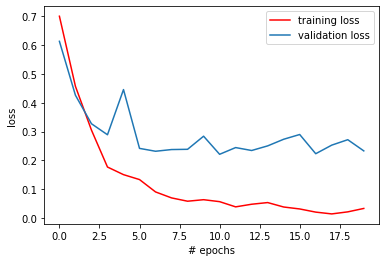

In [6]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 1s 7ms/step
[0.27161680154191953, 0.9347826242446899]


In [8]:
model.save('mask_reco.h5')